#### Задание 2

Здесь проверяем простые гипотезы, оцениваем их влияние

In [1]:
import pandas as pd
import numpy as np
import scipy

import sklearn
from sklearn import manifold
from sklearn import random_projection
from sklearn import cluster

import matplotlib.pyplot as plt
from matplotlib import offsetbox
import seaborn as sns      # For data visualization
import networkx as nx

from IPython.display import display

%matplotlib notebook

In [2]:
ab_data = pd.read_excel('../data/A-B ID_rest vs Rest_attributes.xlsx', header=0)
ac_data = pd.read_excel('../data/A-C ID_rest vs ID_Afisha_user.xlsx', header=0)
cd_data = pd.read_excel('../data/C-D ID_Afisha_user vs ID_SN.xlsx', header=0)
fg_data = pd.read_excel('../data/F_G VK_Group_ID vs Group_attributes.xlsx', header=0)

In [3]:
de_data = pd.read_excel('../data/D-E ID_VK vs VK_attributes.xlsx', header=0)
df_data = pd.read_excel('../data/D-F ID_VK vs VK_Group_ID.xlsx', header=0)

In [4]:
# Get rid of empty and service columns
# de
keys_to_drop = [key for key in de_data.keys() if 'Unnamed' in key]
de_data = de_data.drop(keys_to_drop, axis=1)

# df
df_data = df_data.drop(df_data.columns[[3, 4, 5, 6, 7, 8, 9, 10]], axis=1)



In [5]:
# Fix ID_Rest for ac_data
# Convert it into ID_rest by cutting url path
ac_data['ID_rest'] = ac_data.ID_Rest.map(lambda x: '/' + '/'.join(x.split('/')[3:]))
ac_data = ac_data.drop(ac_data.ID_Rest.name, axis=1)

In [6]:
# Clean up nan
ac_data = ac_data.dropna(axis=0)

In [7]:
display(ab_data.head(5))

display(ac_data.head(5))

display(cd_data.head(5))

display(de_data.head(5))
display(de_data.info())
print(', '.join(de_data.keys()))

display(df_data.head(5))
display(df_data.info())

display(fg_data.head(5))
display(fg_data.info())

,ID_rest,Rest_name,Cuisine,Price,Tags,Address,Longitude,Latitude,Novikov,Italy,Asia,American
0,/msk/restaurant/15958/,Beermarket,Пивные рестораны,700–1500 рублей,"Немецкая кухня,Бургеры,Стейки,Европейская кухн...","Москва, Бутырская, 69",37.582610,55.802497,0,0.0,0.0,1.0
1,/msk/restaurant/218258/,Grammy's,Караоке,1500–2500 рублей,"Европейская кухня,Бары,Караоке","Москва, Кутузовский просп., 2/1, стр. 6, в Кон...",37.566862,55.752318,0,0.0,0.0,0.0
2,/msk/restaurant/19998/,Via Романо,Итальянская кухня,1500–2500 рублей,"Итальянская кухня,Пицца,Паста,Европейская кухня","Москва, Лавочкина, 34",37.493919,55.856295,0,1.0,0.0,0.0
3,/msk/restaurant/75769/,Lao Lee Café,Вьетнамская кухня,До 700 рублей,"Вьетнамская кухня,Вок,Кафе,Стритфуд,Лучшие рес...","Москва, Миусская пл., 9, стр. 11",37.596489,55.778654,0,0.0,1.0,0.0
4,/msk/restaurant/42248/,Double B,Кофейни,До 700 рублей,"Кофейни,Лучшие рестораны в Москве,Где пить кофе","Москва, Милютинский пер., 3",37.631469,55.761573,0,0.0,0.0,0.0


,ID_Afisha_user,ID_rest
0,www.afisha.ru/personalpage/3008125,/msk/restaurant/15958/
1,www.afisha.ru/personalpage/2993572,/msk/restaurant/15958/
2,www.afisha.ru/personalpage/2627134,/msk/restaurant/15958/
3,www.afisha.ru/personalpage/2560943,/msk/restaurant/15958/
4,www.afisha.ru/personalpage/3034211,/msk/restaurant/218258/


,ID_Afisha_user,ID_VK,ID_FB
0,www.afisha.ru/personalpage/2627134,0,http://facebook.com/1075523789126704
1,www.afisha.ru/personalpage/1425368,0,http://facebook.com/698204806958139
2,www.afisha.ru/personalpage/2696251,http://vk.com/id16546298,http://facebook.com/657938597698741
3,www.afisha.ru/personalpage/1337727,0,http://facebook.com/759006417567778
4,www.afisha.ru/personalpage/1024043,0,http://facebook.com/723866285


,ID,NDA01,NDA02,NDA03,NDA04,NDA05,NDA06,NDA07,NDA08,NDA09,...,INTEREST_tourism,INTEREST_travel,INTEREST_TV,INTEREST_ukraine,INTEREST_video,INTEREST_way_of_life,INTEREST_wedding_communities,INTEREST_women_communities,INTEREST_workout,INTEREST_youth_communities
0,10026122@VK,0,0,1,0,0,0,0,30,27,...,0,0,0.0104167,0,0,0.00520833,0,0.078125,0.00520833,0
1,39124462@VK,0,0,1,0,0,0,0,62,154,...,0.00769231,0.00769231,0.00769231,0,0.00769231,0.00769231,0,0.0153846,0,0.0384615
2,13478168@VK,0,0,1,0,0,0,0,47,108,...,0,0,0,0.00854701,0.00854701,0.025641,0,0.042735,0.00854701,0.00854701
3,1020642@VK,0,0,1,0,1,0,0,107,76,...,0,0,0.00826446,0,0,0.00826446,0,0.00826446,0,0
4,2414374@VK,0,0,1,0,0,0,0,31,-,...,0,0,0,0,0,0,0,0.0606061,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Columns: 140 entries, ID to INTEREST_youth_communities
dtypes: object(140)
memory usage: 4.6+ MB


None

ID, NDA01, NDA02, NDA03, NDA04, NDA05, NDA06, NDA07, NDA08, NDA09, NDA10, NDA11, NDA12, NDA13, ActivityIndex, AverageFriendsAge, AverageFriendsRegMonthDelta, EducationType, FriendsAverageDeletedAccounts, FriendsAverageHasHighSchools, FriendsAverageHasJobs, FriendsPerDay, LifeTime, RegDate, MobileUsageAll, MobileUsageAndroid, MobileUsageIPad, MobileUsageIphone, MobileUsageWinPhone, MonthsFromRegDate, NumberOfAdvancedSchools, NumberOfChildren, NumberOfCompanies, NumberOfDeletedFriends, NumberOfFollowers, NumberOfFriends, NumberOfHighSchools, NumberOfRelatives, NumberOfSchools, Relation, UseScreenName, YearsSinceRegDate, INTEREST_acquaint_communic, INTEREST_acquaintances, INTEREST_active_rest, INTEREST_ad, INTEREST_animals, INTEREST_anime_hentai, INTEREST_architecture, INTEREST_art_design, INTEREST_beautiful_girls, INTEREST_beauty, INTEREST_books, INTEREST_business, INTEREST_cars, INTEREST_cartoons, INTEREST_caucasian, INTEREST_celebrities, INTEREST_children, INTEREST_cognitive, INTEREST_

,ID_VK,Group_ID,Сколько VK_ID из колонки A состоят в данной группе
0,42422921@VK,42025607@gVK,55
1,42422921@VK,78878985@gVK,1
2,42422921@VK,11433871@gVK,1
3,42422921@VK,62241785@gVK,14
4,42422921@VK,37631861@gVK,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566922 entries, 0 to 566921
Data columns (total 3 columns):
ID_VK                                                 566922 non-null object
Group_ID                                              566922 non-null object
Сколько VK_ID из колонки A состоят в данной группе    566922 non-null int64
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


None

,Group,Number of VK_ID from Afisha in this group,Category,Subcategory,Group Name,Group Description,Subscribers,Coverage,Visitors
0,24098496@gVK,744,Наука и образование,Познавательно,Esquire,Cообщество любителей журнала Esquire.,2496135.0,667239.0,26518.0
1,29302425@gVK,691,"СМИ, реклама и PR",Реклама,Шедевры рекламы,Лучшее из мира рекламы,2568350.0,702029.0,37213.0
2,30022666@gVK,618,Юмор,Юмор,Лепра,Ле́пра (Проказа) — хроническое инфекционное за...,3695212.0,1358982.0,174315.0
3,32194285@gVK,611,Женские сообщества.Мужские сообщества,Кулинария,Bon Appétit | Лучшие рецепты,Самые вкусные блюда и напитки со всего света!,4504162.0,952341.0,26279.0
4,37119411@gVK,573,Региональные сообщества,Россия.Региональные сообщества,KudaGo: Москва,Афиша Москвы. Самые интересные места и события...,1023639.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222148 entries, 0 to 222147
Data columns (total 9 columns):
Group                                        222148 non-null object
Number of VK_ID from Afisha in this group    222148 non-null int64
Category                                     82946 non-null object
Subcategory                                  82946 non-null object
Group Name                                   88919 non-null object
Group Description                            71178 non-null object
Subscribers                                  88946 non-null float64
Coverage                                     18835 non-null float64
Visitors                                     18835 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 15.3+ MB


None

In [8]:
num = []
for u, rests in ac_data.groupby(by='ID_Afisha_user').groups.items():
    num.append(len(rests))

<IPython.core.display.Javascript object>


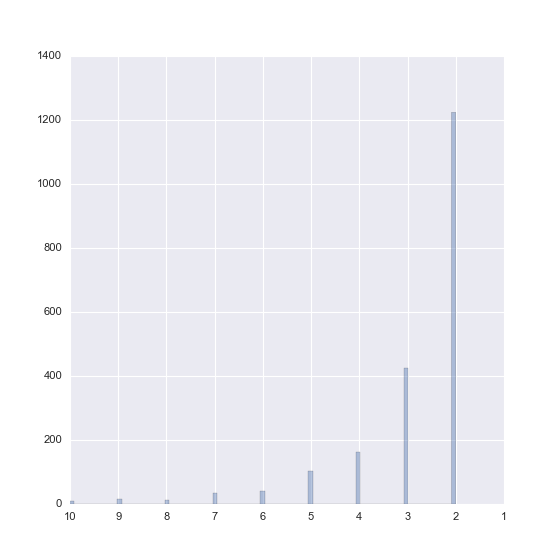

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=10)
sns.distplot([i for i in num if i > 1], kde=0, norm_hist=0, hist=True, ax=ax, bins=1000)

Гипотеза 1  
Существуют группы фейковых пользователей, которые голосуют за множество одних и тех же ресторанов

<IPython.core.display.Javascript object>


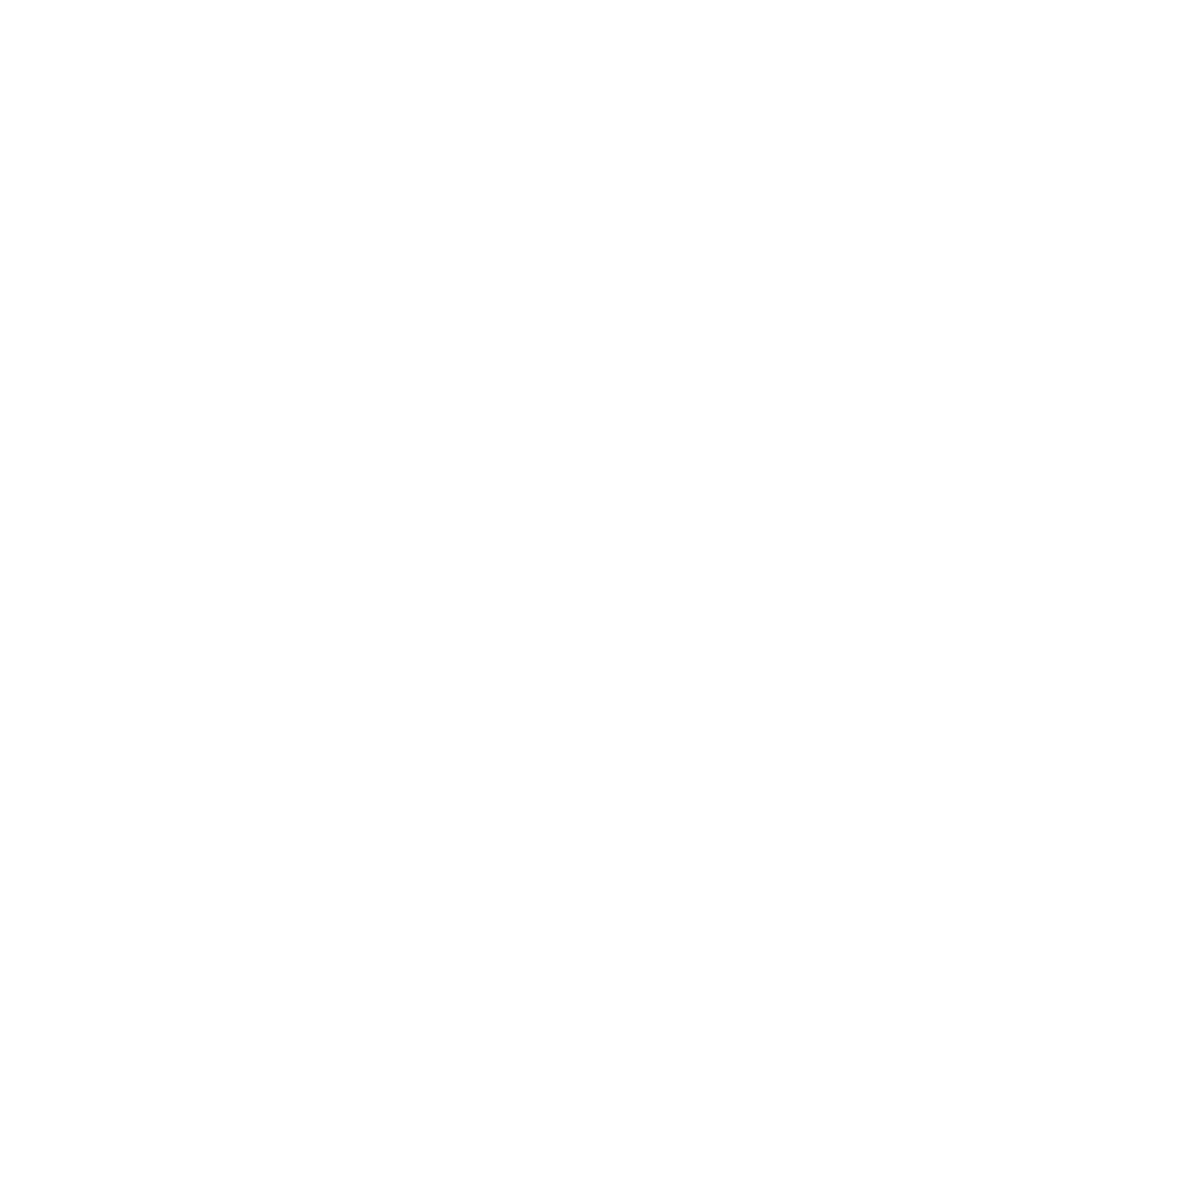

58


In [175]:
G = nx.Graph()
plt.figure(figsize=(15,15))
plt.axis('off')

items = ac_data.groupby(by='ID_Afisha_user').groups.items()
spec = 0
for u1, rests1 in items:
    s_rests1 = set([ac_data.ID_rest[i] for i in rests1])
    if len(s_rests1) < 5:
        continue
        
    f = False
    
    for u2, rests2 in items:
        if u1 == u2:
            break
            
        s_rests2 = set([ac_data.ID_rest[i] for i in rests2])
        if len(s_rests2) < 5:
            continue
        
        if 1.0 * len(s_rests1 & s_rests2) / len(s_rests1 | s_rests2) > 0.6:
            if not f:
                spec += len(rests1)
                f = True
            G.add_edge(u1.split('/')[-1], u2.split('/')[-1])

<IPython.core.display.Javascript object>


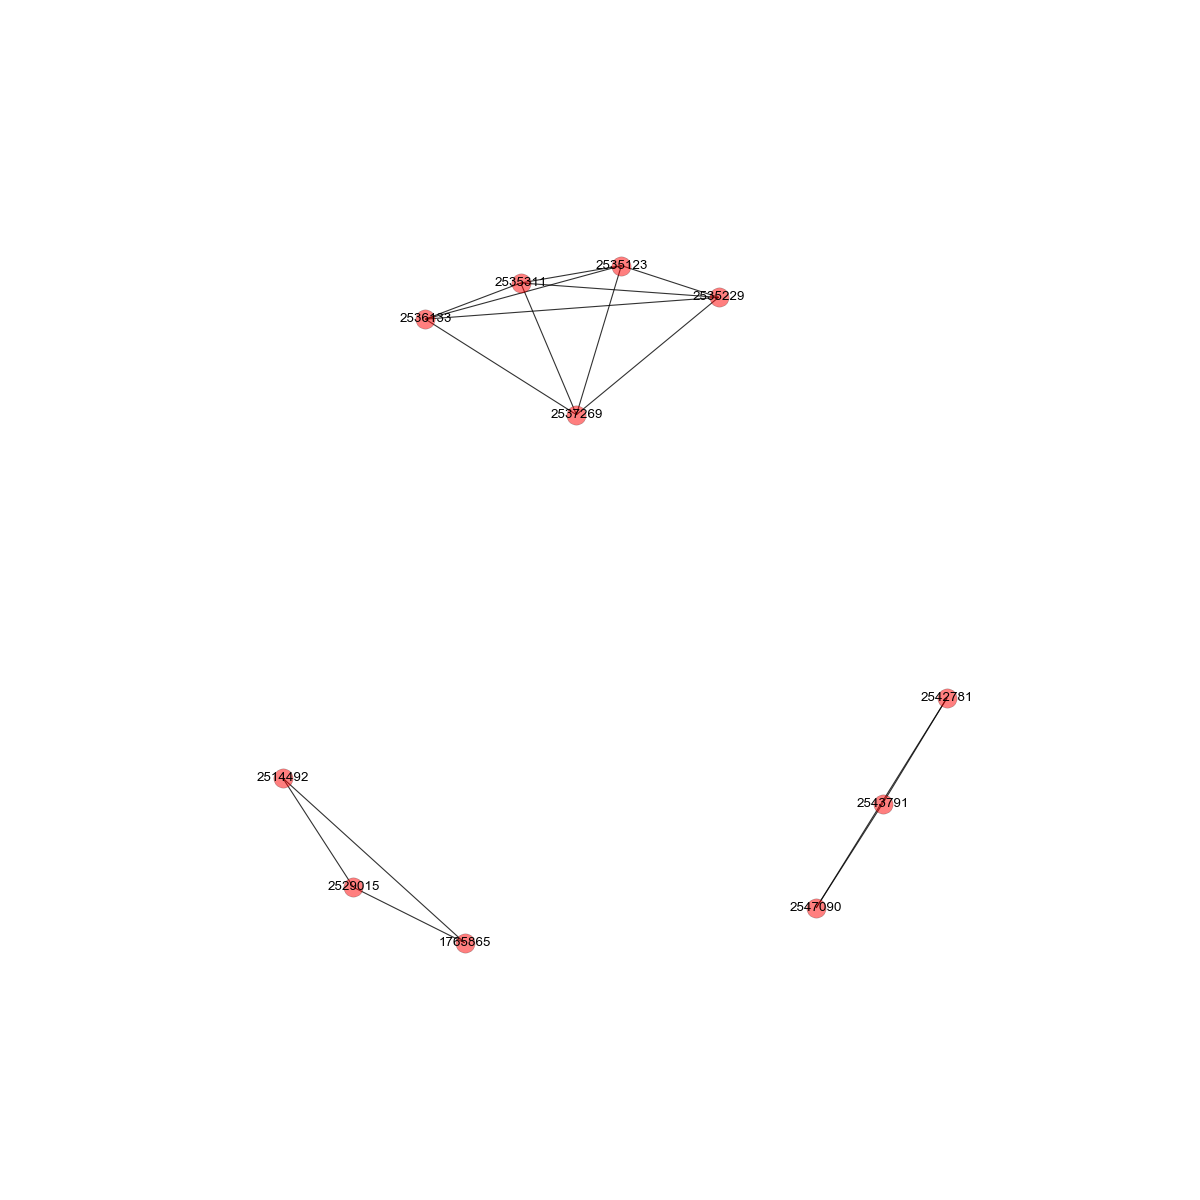

In [176]:
plt.figure(figsize=(15,15))
plt.axis('off')
pos=nx.spring_layout(G, scale=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', alpha=0.8, width=1)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
plt.show() # display

Сколько всего отзывов в нашей выборке?

In [12]:
marks = 0
for u, rests in items:
    marks += len(rests)
print(marks)

18422


Проверяем страницы в соцсетях  
1 параметр — url  
2 параметр — хороший (1) / плохой (0)  
3 параметр - (количество связей в графе друзей) / количество друзей^2  

189 1073

262 2329
831 7289
287 2613
365 2879
345 2519

In [157]:
# print((2136 - 189) / 189**2)
f = lambda user, links: (links - 1037) / (user - 189 - 1)

print((1037) / 189)
print(f(262, 1277))
print(f(831, 4344))
print(f(287, 1677))
print(f(365, 1552))
print(f(345, 1436))
print(f(704, 2541))
print(f(436, 1551))
print(f(452, 2155))
print(f(610, 2482))
print(f(410, 2378))
print(f(440, 1762))
print(f(359, 1392))
print(f(193, 1040))
print(f(404, 2273))
print(f(544, 3204))
print(f(405, 1721))
print(f(234, 1754))
print(f(276, 1175))
print(f(220, 1339))
print(f(365, 1834))
print(f(422, 2517))
print(f(321, 1686))
print(f(443, 1830))
print(f(342, 1957))

5.4867724867724865
3.3333333333333335
5.159126365054602
6.597938144329897
2.942857142857143
2.574193548387097
2.9260700389105057
2.089430894308943
4.267175572519084
3.4404761904761907
6.095454545454546
2.9
2.100591715976331
1.0
5.775700934579439
6.121468926553672
3.181395348837209
16.295454545454547
1.6046511627906976
10.066666666666666
4.554285714285714
6.379310344827586
4.9541984732824424
3.1343873517786562
6.052631578947368


In [158]:
links = \
'''http://www.afisha.ru/personalpage/2979374/ 1 
http://www.afisha.ru/personalpage/2997796/ 0
http://www.afisha.ru/personalpage/1940606/ 1
http://www.afisha.ru/personalpage/2660869/ 1
http://www.afisha.ru/personalpage/2433722/ 0
http://www.afisha.ru/personalpage/2168921/ 0
http://www.afisha.ru/personalpage/2428725/ 1
http://www.afisha.ru/personalpage/626589/ 1
http://www.afisha.ru/personalpage/1081851/ 1
http://www.afisha.ru/personalpage/2607598/ 1
http://www.afisha.ru/personalpage/3017558/ 1
http://www.afisha.ru/personalpage/3016195/ 1
http://www.afisha.ru/personalpage/3064393/ 0
http://www.afisha.ru/personalpage/2614937/ 1
http://www.afisha.ru/personalpage/2826446/ 1
http://www.afisha.ru/personalpage/2804540/ 1
http://www.afisha.ru/personalpage/2364768/ 1
http://www.afisha.ru/personalpage/2542054/ 0
http://www.afisha.ru/personalpage/2536133/ 0
http://www.afisha.ru/personalpage/2894558/ 0
http://www.afisha.ru/personalpage/2999021/ 1
http://www.afisha.ru/personalpage/1123281/ 1
http://www.afisha.ru/personalpage/174780/ 0
http://www.afisha.ru/personalpage/2783472/ 1'''.split('\n')
links = [(i.split()[0][7:-1], int(i.split()[1])) for i in links]

In [159]:
ext_links = []
for u, label in links:
    try:
        vk_id = cd_data.loc[cd_data.ID_Afisha_user == u, :].as_matrix()[0][1]
        vk_id = vk_id.split('/')[-1][2:] + '@VK'
        res = de_data.loc[de_data.ID == vk_id, :].as_matrix()[0]
        # print(vk_id)
        # print(type(list(res)))
        # print(list(res), label)
        if not ext_links:
            for i in range(len(res)):
                ext_links.append([])
            ext_links.append([])
            
        for i in range(len(res)):
            try:
                ext_links[i].append(float(res[i]))
            except:
                ext_links[i].append(1.0)
                
        ext_links[len(res)].append(label)
    except:
        print('missing')
        
        


missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing


In [49]:
ext_links

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 [2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [35.0, 73.0, 45.0, 122.0, 81.0, 36.0, 81.0, 10.0, 53.0, 68.0],
 [61.0, 19.0, 147.0, 346.0, 7.0, 217.0, 454.0, 1.0, 211.0, 5.0],
 [27.0, 18.0, 256.0, 159.0, 61.0, 27.0, 28.0, 228.0, 141.0, 38.0],
 [187.0, 51.0, 84.0, 81.0, 119.0, 32.0, 183.0, 2.0, 1894.0, 39.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0],
 [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]]

[ 0.33333333  0.         -0.2         0.65465367         nan  0.33333333
  0.33333333 -0.00669185  0.01325388 -0.72295324 -0.2845593   0.33333333
  0.33333333  1.        ]


<IPython.core.display.Javascript object>


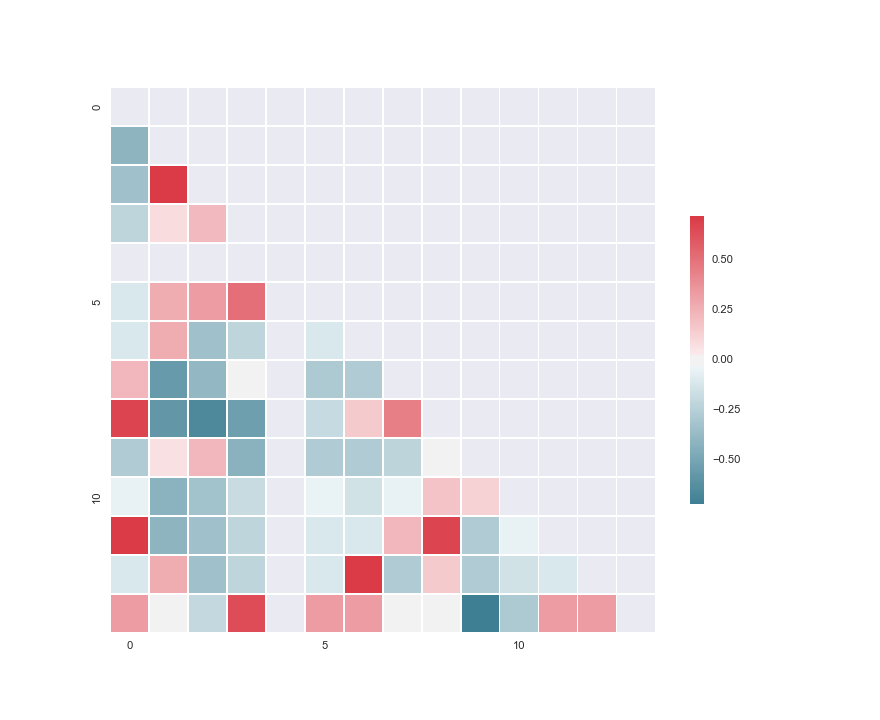

In [52]:
corr = np.corrcoef(np.array(ext_links))
print(corr[-1, :])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

NDA03, NDA09

In [107]:
['1'] + ['2']

['1', '2']

In [160]:
d = np.array(ext_links).transpose()
dd = pd.DataFrame(d, columns=list(de_data.keys()) + ['label'])

display(dd.head(5))

' '.join(de_data.keys())

,ID,NDA01,NDA02,NDA03,NDA04,NDA05,NDA06,NDA07,NDA08,NDA09,...,INTEREST_travel,INTEREST_TV,INTEREST_ukraine,INTEREST_video,INTEREST_way_of_life,INTEREST_wedding_communities,INTEREST_women_communities,INTEREST_workout,INTEREST_youth_communities,label
0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,35.0,61.0,...,0.021505,0.000000,0.0,0.010753,0.000000,0.000000,0.010753,0.000000,0.053763,1.0
1,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,73.0,19.0,...,0.000000,0.006579,0.0,0.000000,0.000000,0.013158,0.052632,0.000000,0.013158,1.0
2,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,45.0,147.0,...,0.001208,0.001208,0.0,0.000000,0.014493,0.000000,0.076087,0.002415,0.021739,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0,346.0,...,0.002079,0.006237,0.0,0.002079,0.012474,0.010395,0.058212,0.000000,0.051975,0.0
4,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,81.0,7.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.052326,0.000000,0.058140,1.0


'ID NDA01 NDA02 NDA03 NDA04 NDA05 NDA06 NDA07 NDA08 NDA09 NDA10 NDA11 NDA12 NDA13 ActivityIndex AverageFriendsAge AverageFriendsRegMonthDelta EducationType FriendsAverageDeletedAccounts FriendsAverageHasHighSchools FriendsAverageHasJobs FriendsPerDay LifeTime RegDate MobileUsageAll MobileUsageAndroid MobileUsageIPad MobileUsageIphone MobileUsageWinPhone MonthsFromRegDate NumberOfAdvancedSchools NumberOfChildren NumberOfCompanies NumberOfDeletedFriends NumberOfFollowers NumberOfFriends NumberOfHighSchools NumberOfRelatives NumberOfSchools Relation UseScreenName YearsSinceRegDate INTEREST_acquaint_communic INTEREST_acquaintances INTEREST_active_rest INTEREST_ad INTEREST_animals INTEREST_anime_hentai INTEREST_architecture INTEREST_art_design INTEREST_beautiful_girls INTEREST_beauty INTEREST_books INTEREST_business INTEREST_cars INTEREST_cartoons INTEREST_caucasian INTEREST_celebrities INTEREST_children INTEREST_cognitive INTEREST_companies INTEREST_computers INTEREST_cookery INTEREST_desi

<IPython.core.display.Javascript object>


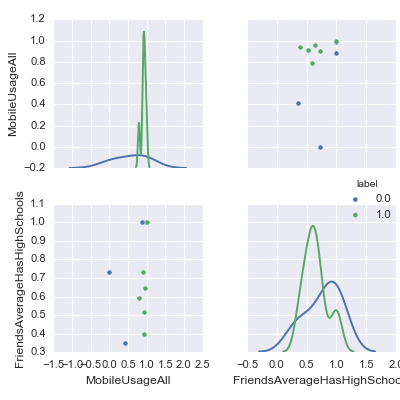

/Users/vlkulpinov/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [174]:
g = sns.pairplot(dd, vars=["MobileUsageAll", 'FriendsAverageHasHighSchools'], hue="label", diag_kind="kde")
g.savefig('pairplot.png')

<IPython.core.display.Javascript object>


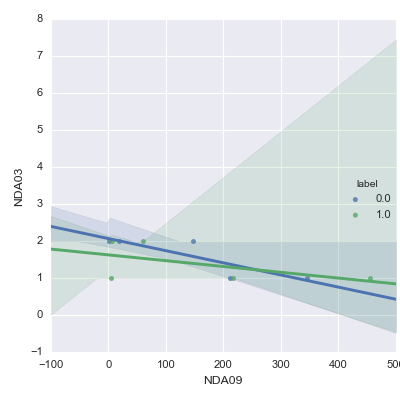

In [88]:
# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))
sns.lmplot(x="NDA09", y="NDA03", hue="label", data=dd)

In [102]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

In [170]:
model = logit("label ~ MobileUsageAll + FriendsAverageHasHighSchools", dd).fit()

         Current function value: 0.000000
         Iterations: 35


/Users/vlkulpinov/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [171]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Jan 2017   Pseudo R-squ.:                   1.000
Time:                        01:26:11   Log-Likelihood:            -2.5475e-06
converged:                      False   LL-Null:                       -6.7301
                                        LLR p-value:                  0.001194
                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                    -1495.1668   3.35e+05     -0.004      0.996     -6.58e+05  6.55e+05
MobileUsageAll                3116.7757   1.44e+05      0.022      0.983     